In [3]:
import numpy as np

def compute_ransac_iterations(p=0.99, epsilon=0.5, s=4):
    """
    Compute the number of iterations needed for RANSAC to achieve a given confidence.
    
    Parameters:
    - p: Desired probability of success (typically 0.99 or 99%)
    - epsilon: Outlier ratio (proportion of points that are outliers)
    - s: Number of points needed to compute the homography (s=4 for homography)
    
    Returns:
    - Number of iterations N (rounded up to the next integer)
    """
    if epsilon == 1:  # Avoid division by zero in case all points are outliers
        return float('inf')
    if epsilon == 0:  # If there are no outliers, only 1 iteration is required
        return 1
    
    numerator = np.log(1 - p)
    denominator = np.log(1 - (1 - epsilon) ** s)
    N = numerator / denominator
    
    return int(np.ceil(N))  # Round up to the next integer

# Example usage
p = 0.99  # 99% confidence
epsilon = 0.4  # 40% of points are outliers
s = 4  # 4 points are needed to estimate a homography

iterations = compute_ransac_iterations(p, epsilon, s)
print(f"Required RANSAC iterations: {iterations}")


Required RANSAC iterations: 34


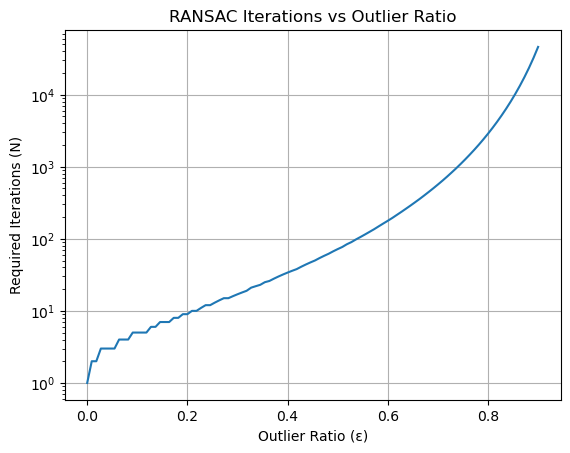

In [5]:
import matplotlib.pyplot as plt

outlier_ratios = np.linspace(0, 0.9, 100)  # Vary the outlier ratio from 0 to 90%
iterations = [compute_ransac_iterations(p=0.99, epsilon=eps, s=4) for eps in outlier_ratios]

plt.plot(outlier_ratios, iterations)
plt.xlabel('Outlier Ratio (ε)')
plt.ylabel('Required Iterations (N)')
plt.title('RANSAC Iterations vs Outlier Ratio')
plt.grid(True)
plt.yscale('log')  # Logarithmic scale for better visualization
plt.show()


In [9]:
p = 0.99  # 99% confidence
epsilon = 0.6  # 40% of points are outliers
s = 4  # 4 points are needed to estimate a homography

iterations = compute_ransac_iterations(p, epsilon, s)
print(f"Required RANSAC iterations: {iterations}")

Required RANSAC iterations: 178


In [12]:
p = 0.99  # 99% confidence
epsilon = 0.2  # 40% of points are outliers
s = 4  # 4 points are needed to estimate a homography

iterations = compute_ransac_iterations(p, epsilon, s)
print(f"Required RANSAC iterations: {iterations}")

Required RANSAC iterations: 9
